In [48]:
%%html
<style>
table{float:left}
</style>


https://tinyurl.com/2p8v7n63

## Overview

1. Radar observations

<img src="dpr.png"
/>
     
2. Characteristics of the DPR (frequencies, sensitivity, vertical and horizontal resolution, sampling)
3. Pros and cons of using DPR for science and applications


| Pros | Cons |
|-----|-----|
| Global observations|  Limited temporal Sampling|
| Great vertical resolution |  Limited horizontal resolution|
| Dual frequency            |  Severe attenuation at Ka-band|
|             |  Limited sensitivity Z>12dBZ|
    


### Data Archives

1. https://storm.pps.eosdis.nasa.gov/storm/data/Service.jsp?serviceName=Order

 * Registration is required (https://arthurhou.pps.eosdis.nasa.gov/register.html)
 * It is menu driven and can be used to regionally and temporarily select/subset files.  
 * Scripts to download the data are automatically generated and emailed to the user.
 * Some visualizing capabilities.

2. https://arthurhou.pps.eosdis.nasa.gov/register.html

<img src="dataServer.png"/>
    
   * More low level (e.g. wget ) but extremely effective.
   
3. https://disc.gsfc.nasa.gov/datasets/GPM_2ADPR_06/summary

* Part of a larger archive.
* Requires a different registration process (that grants access to other datasets)
* Data may be a version behind (it currently is).
* Offers openDAP capabilities (you can visualize and subset the data without having to download the whole file; works nicely when the network behaves).


## DPR Products:

### Reflectivity

1. Attenuated and attenuation corrected reflectivity
2. Vertical structure related products 
3. Attenuation products (from surface analysis)

In [102]:
from netCDF4 import Dataset
fname='2A.GPM.DPR.V9-20211125.20180623-S225140-E002414.024538.V07A.HDF5'
fh=Dataset(fname)
fname2='https://gpm1.gesdisc.eosdis.nasa.gov/opendap/GPM_L2/GPM_2ADPR.06/2018/004/2A.GPM.DPR.V8-20180723.20180104-S000846-E014121.021879.V06A.HDF5'
fh2=Dataset(fname2)
print(fh["FS"])

<class 'netCDF4._netCDF4.Group'>
group /FS:
    FS_SwathHeader: NumberScansInSet=1;
MaximumNumberScansTotal=10000;
NumberScansBeforeGranule=0;
NumberScansGranule=7936;
NumberScansAfterGranule=0;
NumberPixels=49;
ScanType=CROSSTRACK;

    dimensions(sizes): phony_dim_43(7936), phony_dim_44(49)
    variables(dimensions): float32 Latitude(phony_dim_43, phony_dim_44), float32 Longitude(phony_dim_43, phony_dim_44), float32 sunLocalTime(phony_dim_43, phony_dim_44)
    groups: ScanTime, scanStatus, navigation, PRE, VER, CSF, SRT, DSD, Experimental, SLV, FLG, TRG


DPR files contain two structures:
* FS (the full swath) contains data (observations and products) associated with both frequency
* HS (the high-sensitivity swath) contains only observations and products associated with the high sensitivity Ka-observations
Each swath/structure contains multiple subgroubs: ScanTime, scanStatus, navigation, PRE, VER, CSF,SRT, DSD, Experimental, SLV, FLG, TRG

**Let's do some plotting**

In [75]:
print(fh["FS/PRE"])

<class 'netCDF4._netCDF4.Group'>
group /FS/PRE:
    dimensions(sizes): phony_dim_5(7936), phony_dim_6(49), phony_dim_7(2), phony_dim_8(176)
    variables(dimensions): float32 elevation(phony_dim_5, phony_dim_6), int32 landSurfaceType(phony_dim_5, phony_dim_6), float32 localZenithAngle(phony_dim_5, phony_dim_6, phony_dim_7), int32 flagPrecip(phony_dim_5, phony_dim_6), uint8 flagSigmaZeroSaturation(phony_dim_5, phony_dim_6, phony_dim_7), int16 binRealSurface(phony_dim_5, phony_dim_6, phony_dim_7), int16 binStormTop(phony_dim_5, phony_dim_6), float32 heightStormTop(phony_dim_5, phony_dim_6), float32 height(phony_dim_5, phony_dim_6, phony_dim_8), int16 binClutterFreeBottom(phony_dim_5, phony_dim_6), float32 sigmaZeroMeasured(phony_dim_5, phony_dim_6, phony_dim_7), float32 zFactorMeasured(phony_dim_5, phony_dim_6, phony_dim_8, phony_dim_7), float32 ellipsoidBinOffset(phony_dim_5, phony_dim_6), float32 snRatioAtRealSurface(phony_dim_5, phony_dim_6, phony_dim_7), float32 adjustFactor(phony_di

In [27]:
import matplotlib.pyplot as plt
import numpy as np
#print(fh["FS/PRE"])
zObs=fh["FS/PRE/zFactorMeasured"][:,:,:]

Text(0.5, 1.0, 'dBZ')

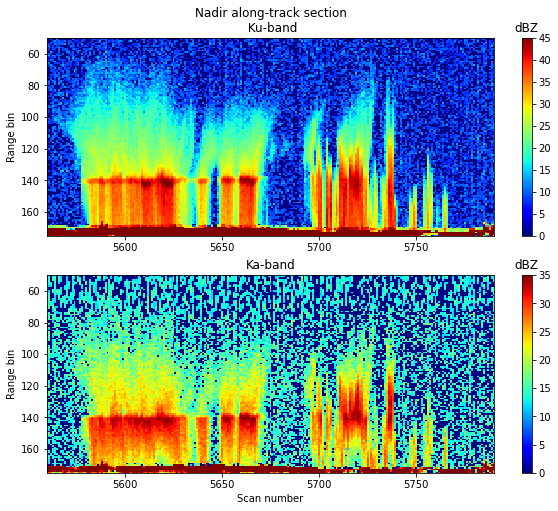

In [43]:
plt.figure(figsize=(10,8))
plt.subplot(211)
c=plt.pcolormesh(5000+np.arange(1000),range(176),zObs[5000:6000,24,:,0].T,vmin=0,vmax=45,cmap='jet')
plt.ylim(175,50)
plt.xlim(5560,5790)
plt.title("Nadir along-track section\n Ku-band")
plt.ylabel('Range bin')
#plt.xlabel('Scan number')
cbar=plt.colorbar(c)
cbar.ax.set_title('dBZ')
plt.subplot(212)
c=plt.pcolormesh(5000+np.arange(1000),range(176),zObs[5000:6000,24,:,1].T,vmin=0,vmax=35,cmap='jet')
plt.ylim(175,50)
plt.xlim(5560,5790)
plt.title("Ka-band")
plt.ylabel('Range bin')
plt.xlabel('Scan number')
cbar=plt.colorbar(c)
cbar.ax.set_title('dBZ')

Text(0.5, 1.0, 'dBZ')

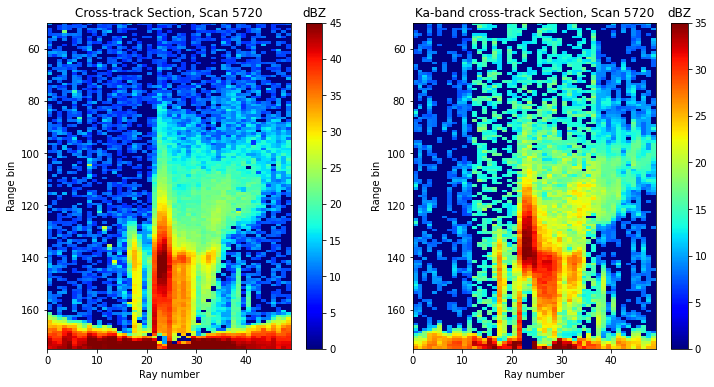

In [47]:
plt.figure(figsize=(12,6))
plt.subplot(121)
c=plt.pcolormesh(zObs[5721,:,:,0].T,vmin=0,vmax=45,cmap='jet')
plt.ylim(175,50)
plt.ylabel('Range bin')
plt.xlabel('Ray number')
cbar=plt.colorbar(c)
plt.title("Cross-track Section, Scan 5720")
cbar.ax.set_title('dBZ')
plt.subplot(122)
c=plt.pcolormesh(zObs[5721,:,:,1].T,vmin=0,vmax=35,cmap='jet')
plt.ylim(175,50)
plt.ylabel('Range bin')
plt.xlabel('Ray number')
cbar=plt.colorbar(c)
plt.title("Ka-band cross-track Section, Scan 5720")
cbar.ax.set_title('dBZ')


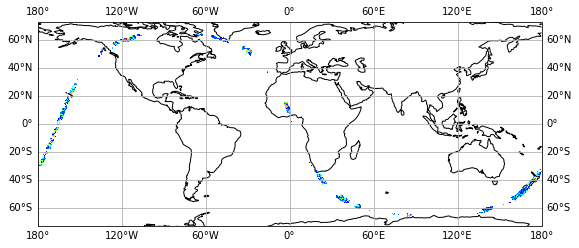

In [64]:
import cartopy.crs as ccrs
#print(fh["FS/SLV"])
plt.figure(figsize=(10,6))
zsfc=fh["FS/SLV/zFactorFinalNearSurface"][:]
lon=fh["FS/Longitude"][:]
lat=fh["FS/Latitude"][:]
crs=ccrs.PlateCarree()
ax = plt.axes([0.15,0.15,0.7,0.7],projection=crs)
ax.coastlines()
plt.pcolormesh(lon,lat,zsfc[:,:,0],cmap='jet',vmin=10,vmax=45)
ax.gridlines(draw_labels=True)

In [58]:
a=np.nonzero((lon[:,24]-125)*(lon[:,24]-180)<0)

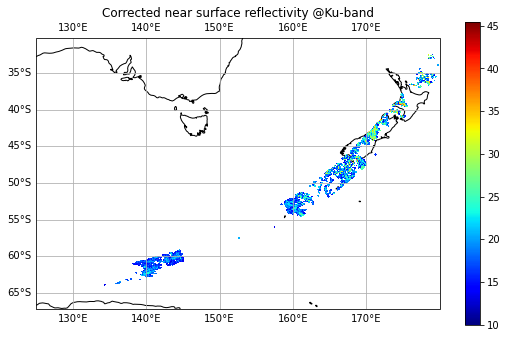

In [77]:
plt.figure(figsize=(10,6))
zsfc=fh["FS/SLV/zFactorFinalNearSurface"][:]
lon=fh["FS/Longitude"][:]
lat=fh["FS/Latitude"][:]
crs=ccrs.PlateCarree()
ax = plt.axes([0.15,0.15,0.7,0.7],projection=crs)
ax.coastlines()
c=plt.pcolormesh(lon[a[0],:],lat[a[0],:],zsfc[a[0],:,0],vmin=10.,cmap='jet')
glines=ax.gridlines(draw_labels=True)
glines.ylabels_right=False
plt.xlim(125,180)
plt.title("Corrected near surface reflectivity @Ku-band")
plt.colorbar()
#print(dir(glines))

### Precipitation Products

1. Precipitation type (e.g. convective/stratiform, heavy ice, etc.) in group **CSF**
2. Precipitation estimates and uncertainties (saved in group **SLV**)
   * Precipitation rates **(SLV/precipRate)**
   * $Z(r)=Z_m(r)/[1-qS(r)]^{1/{\beta}}$
   * $S(r)=\int_0^r Z_m^{\beta}k(Z,N_w)/Z^{\beta} ds$
   * $R=Z(N_w)$
   * Particle size distribution parameters (mean diameters and PSD intercepts) **(SLV/paramDSD)**
   * Precipitation phase **(phaseNearSurface)**
   
### Other SLV variables

* Attenuation Corrected Reflectivities **(SLV/zFactorFinal)**
* Integrated Attenuation  **(SLV/piaFinal)**
   

In [76]:
print(fh["FS/SLV"])

<class 'netCDF4._netCDF4.Group'>
group /FS/SLV:
    dimensions(sizes): phony_dim_31(7936), phony_dim_32(49), phony_dim_33(176), phony_dim_34(2), phony_dim_35(3)
    variables(dimensions): int8 flagSLV(phony_dim_31, phony_dim_32, phony_dim_33), float32 paramDSD(phony_dim_31, phony_dim_32, phony_dim_33, phony_dim_34), int16 binEchoBottom(phony_dim_31, phony_dim_32), float32 piaFinal(phony_dim_31, phony_dim_32, phony_dim_34), float32 sigmaZeroCorrected(phony_dim_31, phony_dim_32, phony_dim_34), float32 zFactorFinal(phony_dim_31, phony_dim_32, phony_dim_33, phony_dim_34), float32 zFactorFinalESurface(phony_dim_31, phony_dim_32, phony_dim_34), float32 zFactorFinalNearSurface(phony_dim_31, phony_dim_32, phony_dim_34), float32 paramNUBF(phony_dim_31, phony_dim_32, phony_dim_35), float32 precipRate(phony_dim_31, phony_dim_32, phony_dim_33), float32 precipWater(phony_dim_31, phony_dim_32, phony_dim_33), float32 precipWaterIntegrated(phony_dim_31, phony_dim_32, phony_dim_34), int32 qualitySLV(ph

## DPR data uses

1. Science
   * Outstanding insight into the physics of precipitating clouds.
   * Outstanding insight into climate processes.
2. Applications
   * DPR and its predecessor have been intended to be flying rain-gauges (instruments to support the development and evaluation of methodologies to estimate precipitation from passive microwave instruments).

In [97]:
fgmi=Dataset("1C.GPM.GMI.XCAL2016-C.20180623-S225140-E002414.024538.V05A.HDF5")
glon=fgmi["S1/Longitude"][:]
glat=fgmi["S1/Latitude"][:]
Tc=fgmi["S1/Tc"][:]
a1=np.nonzero((glon[:,110]-125)*(glon[:,110]-177.25)<0)

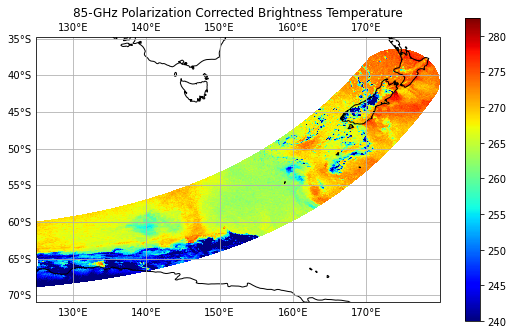

In [100]:
crs=ccrs.PlateCarree()
plt.figure(figsize=(10,6))
ax = plt.axes([0.15,0.15,0.7,0.7],projection=crs)
c=plt.pcolormesh(glon[a1[0],:],glat[a1[0],:],1.64*Tc[a1[0],:,-2]-0.64*Tc[a1[0],:,-1],vmin=240.,cmap='jet')
ax.coastlines()
glines=ax.gridlines(draw_labels=True)
glines.ylabels_right=False
plt.xlim(125,180)
plt.title("85-GHz Polarization Corrected Brightness Temperature")
plt.colorbar()
#print(dir(glines))